## Digit Recognitioner using CNN and Other models

In [1]:
# Importing important modules for prcessing

import tensorflow as tf
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from keras.utils.np_utils import to_categorical
import random

Using TensorFlow backend.


In [19]:
# reading the data from "train.csv" file
data = pd.read_csv('train.csv')

# the label column contatins the target values
Y = data.label
del(data['label']) # I used this to remove the label column so that the rest of the columns could be used for training

X = data
X = X/255.0

#converting target values from [0-9] to 0-1 for every digit value 
#for example the value of 3 is [0 0 1 0 0 0 0 0 0 0 ]
#and 9 is [0 0 0 0 0 0 0 0 1 0]
Y = to_categorical(Y, 10)
img_id = pd.read_csv("sample_submission.csv").ImageId
test = pd.read_csv('test.csv')

In [20]:
test.values.reshape(-1,28,28,1).shape

(28000, 28, 28, 1)

In [21]:
## Displaying first 100 numbers
pic = X[:100].values
img_height = 28
img_width = 28
input_size = img_height * img_width
pic_display = np.zeros(input_size * 100).reshape(280,280)

In [22]:
index = 100
j=0
k=0
for i in range(100):
    if k==10:
        j+=1
        k=0
    pic_display[j*28:(j+1)*28,k*28:(k+1)*28] = pic[i].reshape(28,28)
    k+=1

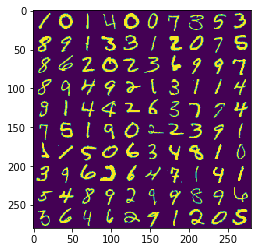

In [23]:
plt.imshow(pic_display, interpolation='nearest')
plt.show()

In [24]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [25]:
#X = X.values.reshape(-1,28,28,1)
#X.shape

In [55]:
model = Sequential()
model.add(Conv2D(filters = 64,kernel_size = (3,3), input_shape =(28,28,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3)))
model.add(Activation('sigmoid'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3)))
model.add(Activation('sigmoid'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(100))
#model.add(Dropout(0.3))

model.add(Dense(50))
#model.add(Dropout(0.3))

model.add(Dense(10))

model.add(Activation('sigmoid'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X.values.reshape(-1,28,28,1),Y, batch_size=200, epochs = 15, validation_split=0.2)

Train on 33600 samples, validate on 8400 samples
Epoch 1/15
33600/33600 [==============================] - 20s 593us/step - loss: 1.7633 - acc: 0.3157 - val_loss: 0.3163 - val_acc: 0.9035
Epoch 2/15
33600/33600 [==============================] - 18s 539us/step - loss: 0.1985 - acc: 0.9386 - val_loss: 0.1339 - val_acc: 0.9586
Epoch 3/15
33600/33600 [==============================] - 18s 538us/step - loss: 0.1128 - acc: 0.9662 - val_loss: 0.1024 - val_acc: 0.9690
Epoch 4/15
33600/33600 [==============================] - 18s 537us/step - loss: 0.0893 - acc: 0.9725 - val_loss: 0.1147 - val_acc: 0.9668
Epoch 5/15
33600/33600 [==============================] - 18s 536us/step - loss: 0.0732 - acc: 0.9771 - val_loss: 0.0845 - val_acc: 0.9721
Epoch 6/15
33600/33600 [==============================] - 18s 537us/step - loss: 0.0600 - acc: 0.9807 - val_loss: 0.0784 - val_acc: 0.9763
Epoch 7/15
33600/33600 [==============================] - 18s 541us/step - loss: 0.0462 - acc: 0.9857 - val_loss: 0.0

In [56]:
y_pred = pd.Series(model.predict_classes(test.values.reshape(-1,28,28,1)))

df1 = pd.concat([img_id,y_pred], axis=1)
df1.columns = ['ImageId','Label']
df1.to_csv("df1.csv", encoding = 'utf-8', index = False)

(28000,)

In [9]:
## simple neural network

model.add(Dense(200, input_shape=(28,28,1), activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X,Y, batch_size = 200, epochs=10, validation_split=0.3)

Train on 29399 samples, validate on 12601 samples
Epoch 1/10
29399/29399 [==============================] - 15s 496us/step - loss: 0.8233 - acc: 0.8761 - val_loss: 0.0912 - val_acc: 0.9786
Epoch 2/10
29399/29399 [==============================] - 14s 459us/step - loss: 0.0497 - acc: 0.9860 - val_loss: 0.0674 - val_acc: 0.9833
Epoch 3/10
29399/29399 [==============================] - 13s 458us/step - loss: 0.0293 - acc: 0.9920 - val_loss: 0.0868 - val_acc: 0.9803
Epoch 4/10
29399/29399 [==============================] - 13s 458us/step - loss: 0.0229 - acc: 0.9933 - val_loss: 0.0719 - val_acc: 0.9826
Epoch 5/10
29399/29399 [==============================] - 14s 461us/step - loss: 0.0144 - acc: 0.9956 - val_loss: 0.0794 - val_acc: 0.9826
Epoch 6/10
29399/29399 [==============================] - 14s 461us/step - loss: 0.0199 - acc: 0.9939 - val_loss: 0.0650 - val_acc: 0.9851
Epoch 7/10
29399/29399 [==============================] - 14s 465us/step - loss: 0.0155 - acc: 0.9953 - val_loss: 0.